In [ ]:
!pip install keras
!pip install ann_visualizer
!pip install graphviz
!pip install tensorflow

!pip install pygad>=2.10.0

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow
import glob
import tensorflow.keras
import pygad.kerasga
import numpy
import pygad
import keras

from keras.models import Sequential
from keras.layers import Dense,Input
from tensorflow.keras.utils import plot_model
from ann_visualizer.visualize import ann_viz
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#The path takes all the CSV files in the folder and then processes them. All the files will be added after the labels are extracted from the file names and then saved in a single dataframe.
path = r'/content/drive/MyDrive/Mendeley_data' # use your path for the Mendeley Data folder containing all csv files
all_files = glob.glob(path + "/*.csv") # List of path for all csv files
print("allfiles:", all_files)

data_frames = []# An empty DataFrame so we can add all csvs together

if not all_files:
    print(f"No CSV files found in the directory: {path}")
else:
    for filename in all_files:
        print("filename", filename)
        label=filename.split('/')[-1].split('_')[0] # extracting labels from csv file names
        print("label", label)
        df = pd.read_csv(filename, index_col=None, header=0, sep=';')
        df['Bankrupt?']=label
        data_frames.append(df)
    # data_frames.head(20)

    data = pd.concat(data_frames, axis=0, ignore_index=True)# Concating all csv files togather
    print(data.head(20))
    #data pre processign techniques

    del data['Unnamed: 0'] # removing an extra index

    #data=data.fillna(0.0) # filling null cells with zero

    clmns=data.columns.to_list() #extracting all columns in the obtained dataframe for further processing except label column
    clmns.remove('Bankrupt?')


    def EroupToFloat(x):# A function to convert all numbers from Eroupean style to float numbers, e.g., 8,69 to 8.69
      if ',' in str(x):
        return float(x.replace(',','.'))
      else: return float(x)


    # Applying above function to all cells in dataframe also calucalting mean of the each column and filling missing value with that mean value
    for column in clmns:
      data[column]=[EroupToFloat(x) for x in data[column]]
      mean_value=data[column].mean()#calculating mean of the particular column

      data[column] = data[column].fillna(value=mean_value) # filling miising cells with mean



    def label2id(x): #function to covert string labels to ids
      if x=='bankrupt':return 1
      else: return 0


    data['Bankrupt?']=[label2id(x) for x in data['Bankrupt?']]

allfiles: ['/content/drive/MyDrive/Mendeley_data/nonbankrupt_construction_15_year_12_13_14.csv', '/content/drive/MyDrive/Mendeley_data/nonbankrupt_agriculture_16_year_13_14_15.csv', '/content/drive/MyDrive/Mendeley_data/nonbankrupt_construction_14_year_11_12_13.csv', '/content/drive/MyDrive/Mendeley_data/nonbankrupt_agriculture_15_year_12_13_14.csv', '/content/drive/MyDrive/Mendeley_data/nonbankrupt_manufacture_13_year_10_11_12.csv', '/content/drive/MyDrive/Mendeley_data/nonbankrupt_construction_16_year_13_14_15.csv', '/content/drive/MyDrive/Mendeley_data/nonbankrupt_agriculture_14_year_11_12_13.csv', '/content/drive/MyDrive/Mendeley_data/nonbankrupt_construction_13_year_10_11_12.csv', '/content/drive/MyDrive/Mendeley_data/nonbankrupt_agriculture_13_year_10_11_12.csv', '/content/drive/MyDrive/Mendeley_data/bankrupt_manufacture_15_year_12_13_14.csv', '/content/drive/MyDrive/Mendeley_data/bankrupt_retail_15_year_12_13_14.csv', '/content/drive/MyDrive/Mendeley_data/bankrupt_agriculture_13

In [ ]:
data.head(20)#print first 5 rows of dataset

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V55,V56,V57,V58,V59,V60,V61,V62,V63,Bankrupt?
0,0.12,8.94,8.32000,0.980000,1.01,1.01,24942.800000,907.80000,24261.040000,233.485747,...,14.25,6.27,92.98,1.56,23.851035,19030.60399,0.00,69.84,71.15,0
1,3.53,42.06,0.98000,0.120000,0.97,0.97,101.120000,73.44000,86.210000,233.485747,...,9.47,31.67,89.44,7.31,1.830000,19030.60399,6.92,9.16,60.65,0
2,1.64,1.72,2.89000,11.430000,19.56,19.61,642.390000,205.22000,25.270000,1.260000,...,1.46,12.79,31.74,28.07,5.900000,19030.60399,0.00,9.34,26.89,0
3,0.49,0.49,1.35000,922.330000,922.33,922.33,260.100000,2010.79609,1.080000,233.485747,...,1.07,21.63,6.18,350.00,23.851035,19030.60399,0.00,0.00,0.00,0
4,2.95,2.98,0.71000,40.160000,144.81,144.81,34.790000,62.42000,0.600000,233.485747,...,14.55,33.58,93.13,7.86,1.180000,19030.60399,0.00,26.98,76.45,0
5,40.83,-89.71,71.21501,0.060000,0.10,0.10,5450.943846,2010.79609,2409.202853,233.485747,...,4.39,19.54,77.22,28.31,0.580000,19030.60399,0.00,0.00,0.00,0
6,-28.64,866.12,-11.84000,0.020000,0.31,0.32,150.860000,42.69000,149.680000,1.410000,...,1.89,45.79,47.07,28.28,0.960000,19030.60399,5.98,15.48,54.89,0
7,73.41,89.52,50.78000,1.200000,5.72,5.72,252.470000,196.61000,43.560000,233.485747,...,1.52,3.03,34.32,-5.68,23.851035,19030.60399,0.02,14.82,89.11,0
8,-17.46,-25.74,-8.87000,2.920000,3.48,3.50,185.350000,12.85000,22.870000,0.370000,...,2.33,43.81,57.16,112.58,5.360000,5144.00000,0.00,2.14,11.63,0
9,-35.52,60.82,-33.53000,9.467094,0.00,0.56,344.520000,2010.79609,506.750000,288.560000,...,-1.06,54.57,194.77,9.21,23.851035,19030.60399,0.00,3.90,42.66,0


In [ ]:
data.shape #Size of Data


(51407, 64)

In [ ]:
data['Bankrupt?'].value_counts() #Label distribution in dataset---- highely imbalanced


,count
Bankrupt?,
0,51156
1,251


In [ ]:
y = data['Bankrupt?']
X = data.drop(columns=['Bankrupt?'])
X = np.asarray(X).astype(np.float32) # converting vectors to array forms for training in NN model
y=tf.keras.utils.to_categorical(y, num_classes=2)
class_weight = {0: 1., 1: 30.}

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)


In [ ]:
NoEpochs= 150 # you can set any number of epochs for training your NN model

In [ ]:
#The code for sequential model is taken from the KERAS library in the reference section (https://keras.io/guides/sequential_model/)
def Build_Model():
  # fix random seed for reproducibility
  np.random.seed(7)
  # create model
  model = Sequential()
  model.add(Input(shape=(X_train.shape[1],))) # Explicitly define input shape
  model.add(Dense(12, activation='relu'))
  model.add(Dense(8, activation='relu'))
  model.add(Dense(2, activation='softmax'))
  # Compile model
  model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])
  # Fit the model
  model.fit(X_train, y_train, epochs=NoEpochs,class_weight=class_weight, batch_size=10)
  return model

In [ ]:
model=Build_Model()

Epoch 1/150
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 11s 3ms/step - accuracy: 0.9424 - loss: 1211.8987
Epoch 2/150
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8597 - loss: 1021.9765
Epoch 3/150
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.8711 - loss: 164.1408
Epoch 4/150
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9018 - loss: 877.8290
Epoch 5/150
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9491 - loss: 109.8739
Epoch 6/150
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9685 - loss: 66.6735
Epoch 7/150
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9792 - loss: 36.2943
Epoch 8/150
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9906 - loss: 302.3909
Epoch 9/150
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9877 - loss: 49.3148
Epoch 10/150
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 9s 2ms/step - accuracy: 0.9902 - loss: 2595.3215
Epoch 11/150
3599/3599 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9903 - loss: 

In [ ]:

scores = model.evaluate(X_test, y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

482/482 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9957 - loss: 0.1755

compile_metrics: 99.57%


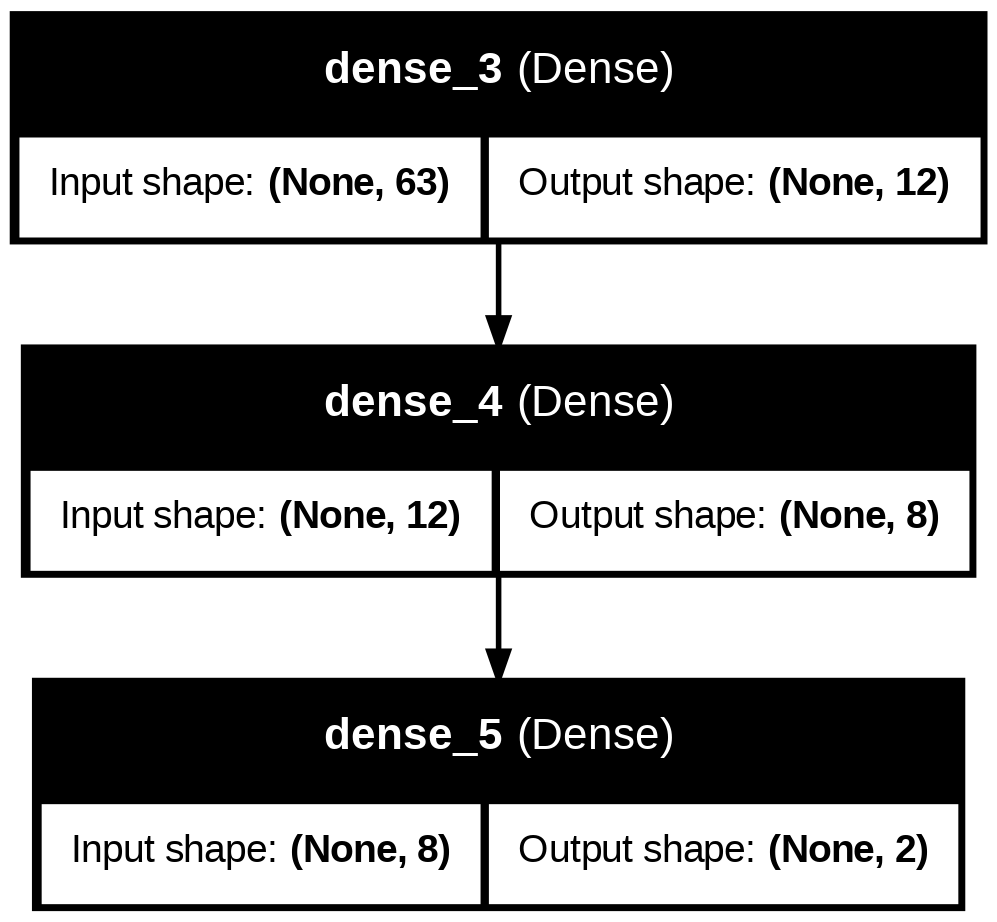

In [ ]:
#plot model shows the structure of the sequential model with the explaiantion of every layer. It is a keras feature.
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
ann_viz(model, title="Model")
#download image from network.gv.pdf

In [ ]:
#Data input
data_inputs = X_train
# Data outputs
data_outputs =y_train

In [ ]:
#code taken from the pygad library https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html
def fitness_func(ga_instance, solution, sol_idx):
    global data_inputs, data_outputs, keras_ga, model

    model_weights_matrix = pygad.kerasga.model_weights_as_matrix(model=model,
                                                                 weights_vector=solution)

    model.set_weights(weights=model_weights_matrix)

    predictions = model.predict(data_inputs)

    cce = tensorflow.keras.losses.CategoricalCrossentropy()
    solution_fitness = 1.0 / (cce(data_outputs, predictions).numpy() + 0.00000001)

    return solution_fitness

In [ ]:
#code taken from the pygad library https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html
def callback_generation(ga_instance):
    print("Generation = {generation}".format(generation=ga_instance.generations_completed))
    print("Fitness    = {fitness}".format(fitness=ga_instance.best_solution()[1]))

In [ ]:
#Create an Instance of the pygad.GA Class
keras_ga = pygad.kerasga.KerasGA(model=model,num_solutions=10)#the number of solutions within the population was set to 10


In [ ]:
NoGenerations=15 # you can set different values

In [ ]:
# Code taken from the pygad library https://pygad.readthedocs.io/en/latest/README_pygad_ReadTheDocs.html
num_generations = NoGenerations
num_parents_mating = 5 #the number of parents to mate must be less than 10 (number of solutions).
initial_population = keras_ga.population_weights

ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       initial_population=initial_population,
                       fitness_func=fitness_func,
                       on_generation=callback_generation)



In [ ]:
ga_instance.run()

1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
Generation = 1
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/s

In [ ]:
# Returning the details of the best solution.
solution, solution_fitness, solution_idx = ga_instance.best_solution()
print("Fitness value of the best solution = {solution_fitness}".format(solution_fitness=solution_fitness))
print("Index of the best solution : {solution_idx}".format(solution_idx=solution_idx))

# Fetch the parameters of the best solution.
best_solution_weights = pygad.kerasga.model_weights_as_matrix(model=model,
                                                              weights_vector=solution)
model.set_weights(best_solution_weights)
predictions = model.predict(np.array(X_test))
# print("Predictions : \n", predictions)

# Calculate the categorical crossentropy for the trained model.
cce = tensorflow.keras.losses.CategoricalCrossentropy()
print("Binary Crossentropy : ", cce(y_test, predictions).numpy())

# Calculate the classification accuracy for the trained model.
ca = tensorflow.keras.metrics.BinaryAccuracy()

ca.update_state(y_test, predictions)
accuracy = ca.result().numpy()
print("Accuracy : ", accuracy)

1125/1125 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
1125/1125 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Fitness value of the best solution = 17.704025268554688
Index of the best solution : 0
482/482 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Binary Crossentropy :  0.04514195
Accuracy :  0.99565583


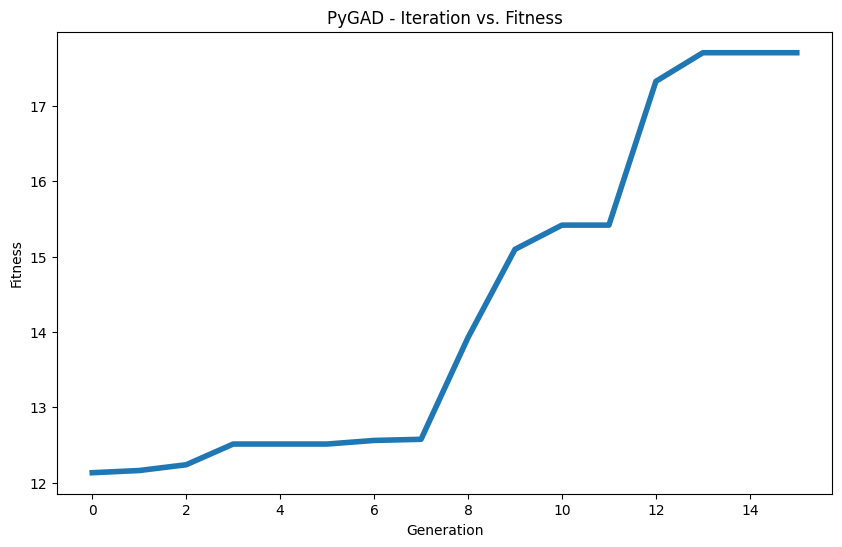

In [ ]:
import matplotlib.pyplot as plt

# Get the fitness values from the log
fitness_history = ga_instance.best_solutions_fitness

# Plot the fitness history
plt.figure(figsize=(10, 6))
plt.plot(fitness_history, linewidth=4)
plt.title("PyGAD - Iteration vs. Fitness")
plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.show()

In [ ]:
#Test function

def Test_Function(inputRow):
  pred=model.predict(np.array(inputRow))
  pred=np.argmax(pred)
  return pred

In [ ]:
Test_Function([1,2,3,4,5,42,1,1,4,4,5,5,5,2,1,1,2,4,4,2,12,4])

ValueError: Exception encountered when calling Sequential.call().

[1mInvalid input shape for input Tensor("sequential_1_1/Cast:0", shape=(22,), dtype=float32). Expected shape (None, 63), but input has incompatible shape (22,)[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=(22,), dtype=int64)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [ ]:
Test_Function(X_test[1:2])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


np.int64(0)

In [ ]:
Test_Function(X_test[10:11])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


np.int64(0)

In [ ]:
for index in range(len(X_test[50])):
  if Test_Function(X_test[index:index+1])==1:
    print(index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━

In [ ]:
Test_Function(X_test[1154:1155])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


np.int64(0)